### Zadatak 4
Napravite niz od 10 jednakoudaljenih brojeva u intervalu \[1, 10\]. Svakom broju
pridružite drugi broj po formuli
$${y = a \times x + b}$$
te pogrešku vezanu uz ${y}$.
Pri tome su ${a}$ nasumično generirani brojevi iz intervala \[-1, 1\], a ${b}$ nasumično generirani brojevi iz intervala \[-10, 10\].<br>
Pogreške od ${y}$ generirajte tako da za svaki ${y}$ pogreška bude nasumični broj iz Gaussove raspodjele sa sredinom u 0 i standardnom devijacijom jednakom ${b}$.<br>
Nacrtajte graf ovisnosti ${y}$ o ${x}$ i ucrtajte generirane točke s pogreškama u njega.<br>
Nafitajte linearnu funkciju na generirane podatke i ucrtajte pravac u isti graf.<br>
Ispišite parametre fita s pogreškama i izračunajte zbroj kvadrata odstupanja pravca od točaka.

a = -0.574 +/- 1.120
b = 2.513 +/- 6.950
Zbroj kvadrata odstupanja = 828.0287664682659


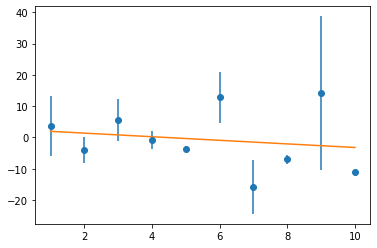

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.linspace(1, 10, 10)
b = np.random.uniform(-10, 10, 10)
a = np.random.uniform(-1, 1, 10)
y = a*x + b

pogreske = np.abs(np.random.normal(loc=0, scale=np.abs(b), size=10))

def model(x, a, b):
    return a*x + b

pars, cov = curve_fit(model, x, y)
for k, par in enumerate(['a', 'b']):
    print('{} = {:.3f} +/- {:.3f}'.format(par, pars[k], np.sqrt(cov[k,k])))
    
print('Zbroj kvadrata odstupanja =', np.sum((y-model(x, *pars))**2))

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr = pogreske, fmt='o')
ax.plot(x, model(x, *pars))